## Outline

  - 3D Graphs
    - np.meshgrid()
    - Working of meshgrid
    - Plot_surface

  - Pie charts
    
 

***

## 3-D Graphs

- Matplotlib allows us to plot 3-D graphs

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

a = np.array([0, 1, 2, 3])
b = np.array([0, 1, 2])

a, b = np.meshgrid(a, b) # We'll use numpy's meshgrid

In [ ]:
a

array([[0, 1, 2, 3],
       [0, 1, 2, 3],
       [0, 1, 2, 3]])

In [ ]:
b

array([[0, 0, 0, 0],
       [1, 1, 1, 1],
       [2, 2, 2, 2]])

#### Notice here:
- `meshgrid()` allows you to **convert a 1-D array into 2-D**

#### How is `meshgrid()` working?

- It **takes dimensions of both arrays `a` and `b`**
    - Dimension of `a` is (4,)
    - Dimension of `b` is (3,)


- **Creates two $3\times4$ matrices**


- In **first matrix**, array of **`a` repeats 3 times** and gets **stacked vertically**


- In **second matrix**, array of **`b` repeats 4 times** and gets **stacked horizontally**


#### So, we get all possible combinations as coordinates

`
(0,0)  (1, 0)  (2, 0)  (3, 0)
(0,1)  (1, 1)  (2, 1)  (3, 1)
(0,2)  (1, 2)  (2, 2)  (3, 2)
`


- **Two 1-D arrays get converted into a meshgrid**


#### We can use the meshgrid to plot our 3-D graph

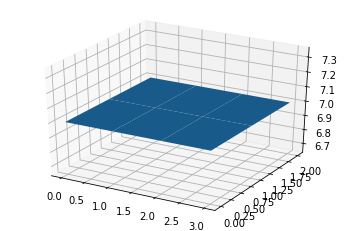

In [ ]:
fig = plt.figure()  # Let's save plt.figure() in fig
ax = fig.add_subplot(projection='3d')
ax.plot_surface(a, b, np.array([[7]]) )  # 3rd argument is the elevation in 3-D we want 
plt.show()

#### Observe that:

- **Range on the axes of our plane surface** is taken from **`a` and `b`**

    - **x-axis is represented by `a`** ---> 0 to 3
    
    
    - **y-axis is represented by `b`** ---> 0 to 2    


- The **3rd dimension is the height from the floor we passed in**

    - - **z-axis is represented by the elevation** we provided ---> 7


#### Question: Did everyone get this output?


#### Let's build a more complex 3-D plot

In [ ]:
a = np.arange(-1, 1, 0.005)  # I am going to use a very small step-size 
b = a  
a, b = np.meshgrid(a, b)


# Since `a` and `b` are some, this time we'll get a square matrix

In [ ]:
a.shape

(400, 400)

In [ ]:
b.shape

(400, 400)

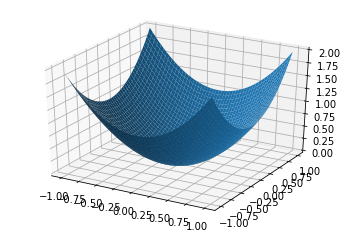

In [ ]:
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.plot_surface(a, b, a**2 + b**2) # We'll NOT keep a constant z-axis elevation this time
plt.show()

#### Notice that:

- **Higher the values of `a` and `b`, higher will be z-axis value**


- At **`(a, b) = (0, 0)`**, `z` is **lowest at 0**


- The **dimensions of `a`, `b` and `a^2 + b^2` are all same**
    - $400\times400$
    

- That is why it is able to map all **(x, y, z) coordinates**

In [ ]:
(a**2).shape

(400, 400)

In [ ]:
(a**2 + b**2).shape

(400, 400)

### Pie charts

Finally Matplotlib also provide you with **Pie charts**

We won't go into too much details of it - We know what a Pie Chart is 

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
!wget https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/021/299/original/final_vg1_-_final_vg_%281%29.csv?1670840166 -O final_vg.csv

--2023-02-10 11:24:06--  https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/021/299/original/final_vg1_-_final_vg_%281%29.csv?1670840166
Resolving d2beiqkhq929f0.cloudfront.net (d2beiqkhq929f0.cloudfront.net)... 13.227.211.142, 13.227.211.117, 13.227.211.200, ...
Connecting to d2beiqkhq929f0.cloudfront.net (d2beiqkhq929f0.cloudfront.net)|13.227.211.142|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2041483 (1.9M) [text/plain]
Saving to: ‘final_vg.csv’

final_vg.csv        100%[===================>]   1.95M  2.47MB/s    in 0.8s    

2023-02-10 11:24:07 (2.47 MB/s) - ‘final_vg.csv’ saved [2041483/2041483]



In [ ]:
data = pd.read_csv('final_vg.csv')

If you remember, we had made a sales across regions piechart in the lecture.

Let's plot the same using matplotlib now

In [ ]:
sales_data = data[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']]
region_sales = sales_data.T.sum(axis='columns')

In [ ]:
region_sales

NA_Sales       45831.525845
EU_Sales       33251.970702
JP_Sales       41624.625635
Other_Sales    19180.256828
dtype: float64

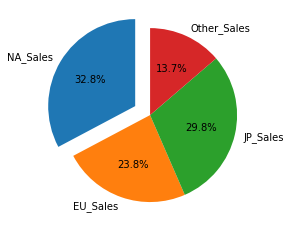

In [ ]:
plt.pie(region_sales,
       labels=region_sales.index,
        autopct='%1.1f%%',
       startangle=90,
       explode=(0.2,0,0,0))
plt.show()

#### How does a lineplot form when there are multiple values for the same data?

In the lecture, the games only had a single sales value per year.

#### But what if we want to see a trend for Publisher?

Every Publisher has multiple games, so multiple values for sales.

Let's check for top 3 publishers

In [ ]:
data['Publisher'].value_counts()

Electronic Arts                 1351
Activision                      1014
Namco Bandai Games               932
Ubisoft                          921
Konami Digital Entertainment     832
                                ... 
TYO                                1
Commseed                           1
Fortyfive                          1
Xing Entertainment                 1
MediaQuest                         1
Name: Publisher, Length: 578, dtype: int64

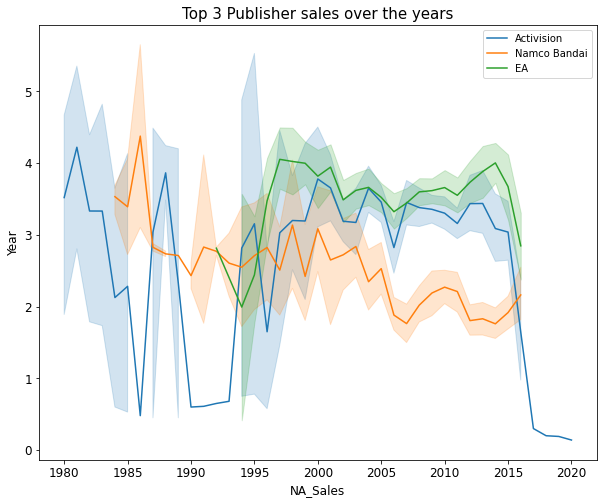

In [ ]:
plt.figure(figsize=(10,8))
sns.lineplot(x='Year', y='NA_Sales', data=data.loc[data['Publisher']=='Activision'], label='Activision')
sns.lineplot(x='Year', y='NA_Sales', data=data.loc[data['Publisher']=='Namco Bandai Games'],label='Namco Bandai')
sns.lineplot(x='Year', y='NA_Sales', data=data.loc[data['Publisher']=='Electronic Arts'],label='EA')
plt.title('Top 3 Publisher sales over the years', fontsize=15)
plt.xlabel('NA_Sales', fontsize=12)
plt.ylabel('Year', fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend()
plt.show()

Do you notice something different?

#### What is this shaded region around the seaborn lineplot?

- Since there are multiple values for each publisher, seaborn automatically plots the mean of all the values

- The shaded region is basically 95% confidence interval of the sales